In [1]:
from sklearn.datasets import make_blobs
import mglearn
import matplotlib.pyplot as plt

#선형적으로 분류되지 않는 클래스를 가진 이진 데이터셋
X, y = make_blobs(centers=4, random_state=8) # 모의데이터 만들어줌
                            # 4개의 군집데이터(4개로 분류 될 수 있다)
y = y%2 # 2진분류처럼
# 2로 나눈 나머지값
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

# class가 두개인데 선형으로 나눌 수가 없어
# 이것을 입체적으로 보면 결정면을 구해줄 수 있다 => SVM
# 고차원 상의 데이터를 배치하게 되면 데이터 사이의 경계면을 찾을 수 있다
# 특성을 곱하거나 제곱해서 
# 데이터를 위에서 봤을 때
# 회귀분석으로는 못해

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'feature 1')

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'feature 1')

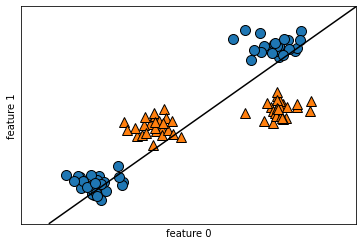

In [2]:
# 선형회귀로 경계면을 찾을 수 있는지 확인
# 분류를 위한 선형 모델은 직선으로만 데이터 포인트를 나눈다.

from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel('feature 0')
plt.ylabel('feature 1')

Text(0.5, 0, 'feature1 ** 2')

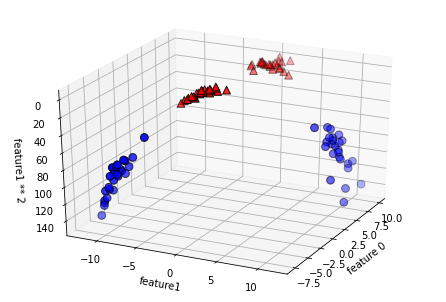

In [5]:
# 두번째 특성을 제곱한 특성으로 새로운 특성을 추가해서 입력 특성을 확장
import numpy as np
from mpl_toolkits.mplot3d import Axes3D, axes3d
#conda install basemap ,  pip install -U matplotlib

X_new = np.hstack([X, X[:,1:]**2]) 

figure = plt.figure()

# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)

# y == 0인 포인트를 먼저 그리고 그다음 y == 1인 포인트를 그립니다.
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature 0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature 1 ** 2')

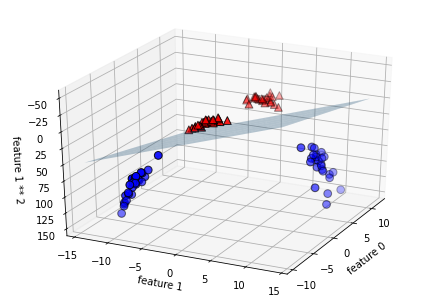

In [7]:
#선형 모델과 3차원 공간의 평면을 사용해 두 클래스를 분류
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature 0")
ax.set_ylabel("feature 1")
ax.set_zlabel("feature 1 ** 2")

Text(0, 0.5, '특성 1')

C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\student\Anaconda3\envs\cpu_env\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0, flags=flags)


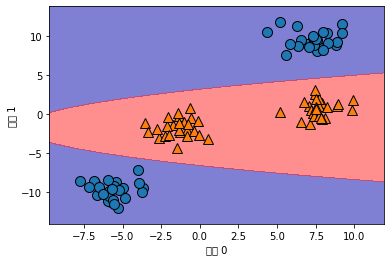

In [8]:
#선형SVM 모델은 직선이 아닌 타원에 가까운 분류 경계를 찾아줌

ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

In [11]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
iris = datasets.load_iris() #데이터 로드
features = iris.data[:100,:] #두 개의 클래스만 선택
target = iris.target[:100]
scaler = StandardScaler() # 특성을 표준화
features_standardized = scaler.fit_transform(features)
svc = SVC(kernel="linear", random_state=0) # 서포트 벡터 분류기 객체 생성
model = svc.fit(features_standardized, target) # 분류기 훈련
print(model.support_vectors_) # 서포트 벡터를 확인
print(model.support_)

[[-0.5810659   0.42196824 -0.80497402 -0.50860702]
 [-1.52079513 -1.67737625 -1.08231219 -0.86427627]
 [-0.89430898 -1.4674418   0.30437864  0.38056609]
 [-0.5810659  -1.25750735  0.09637501  0.55840072]]
[23 41 57 98]


## KNN으로 titanic 데이터 분류 분석 수행을 SVM으로 분류 분석 수행하고 평가 지표 비교  ##############

In [ ]:
import pandas as pd
import seaborn as sns

df  = sns.load_dataset('titanic')
print(df.head())
print(df.info())

#deck열(NaN이 많은)삭제, embarked와 embark_town열의 의미가 동일하므로 embark_town 삭제
rdf = df.drop(['deck', 'embark_town'], axis=1)
print(rdf.columns.values)

#age열에 NaN 데이터를 가지는 행 삭제 (고유값으로 확인 가능)
rdf = rdf.dropna(subset=['age'], how='any', axis=0)
print(len(rdf))

#embarked 열에 NaN 값을 가장 많은 승선도시 값으로 치환
most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()
print(most_freq)
#print(rdf.describe(include='all'))
rdf['embarked'].fillna(most_freq, inplace=True)

#분석에 활용할 특성 선택
ndf = rdf[['survived', 'pclass', 'sex' ,'age' ,'sibsp' ,'parch',  'embarked' ]]
print(ndf.head())

# 범주형 데이터를 정수형으로 변환(one hot encoding) - 'sex', 'embarked' 
onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)
print(ndf.head())

#특성(독립변수)과 타겟(종속변수) 분리
X=ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 'town_C', 'town_Q', 'town_S']]   
y=ndf['survived']   

#특성(독립변수) 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train,  test dataset 분리 (7: 3)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)


# KNN 분류(k=5로 설정)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)   
y_hat = knn.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
knn_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(knn_matrix)

# 모형 성능 평가 - 평가지표 계산
knn_report = metrics.classification_report(y_test, y_hat)            
print(knn_report)